In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df =  pd.read_csv('./Housing.csv')

In [58]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [85]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

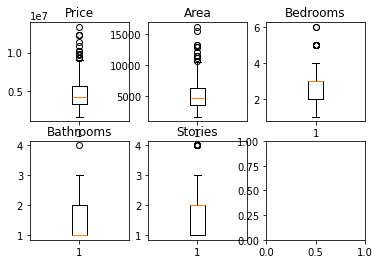

In [61]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(df['price'])
axs[0, 0].set_title('Price')

axs[0, 1].boxplot(df['area'])
axs[0, 1].set_title('Area')

axs[0, 2].boxplot(df['bedrooms'])
axs[0, 2].set_title('Bedrooms')a

axs[1, 0].boxplot(df['bathrooms'])
axs[1, 0].set_title('Bathrooms')

axs[1, 1].boxplot(df['stories'])
axs[1, 1].set_title('Stories')

plt.show()


In [62]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3 - q1 

lowerlimit = q1 - 1.5*iqr
upperlimit = q3 + 1.5*iqr

In [63]:
df_no_outliers = df[(df['price']>lowerlimit)&(df['price']<upperlimit)]

In [64]:
df_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [65]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [66]:
def binary(df, cols):
    for col in cols:
        df[col] = df[col].map({'no': 0, 'yes':1})
binary(df,varlist)

In [67]:
status = pd.get_dummies(df['furnishingstatus'], drop_first= True)

In [68]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [69]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [70]:
pd.concat([df,status],axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [71]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [72]:
X =  df.drop('price',axis=1)
Y = df['price']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [74]:
scaler = MinMaxScaler()

In [75]:
varlist = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [76]:
X_train[varlist] = scaler.fit_transform(X_train[varlist])
X_test[varlist] = scaler.fit_transform(X_test[varlist])

In [77]:
lm = LinearRegression()
poly_lm = LinearRegression()
lasso = Lasso()
ridge = Ridge()
poly = PolynomialFeatures(degree=5)

In [78]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [80]:
lm.fit(X_train,Y_train)
poly_lm.fit(X_train_poly,Y_train)
lasso.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)

Ridge()

In [84]:
y_pred_lm = lm.predict(X_test)
y_pred_poly_lm = poly_lm.predict(X_test_poly)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [86]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_lm, Y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = (mse)**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_pred_lm, Y_test)
print(f'Coefficient of Determination r2: {r2}')

Mean Squared Error (MSE): 1755792259015.8003
Root Mean Squared Error (RMSE): 1325063.115106522
Coefficient of Determination r2: 0.5729594727706502


In [91]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_poly_lm, Y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = (mse)**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_pred_poly_lm, Y_test)
print(f'Coefficient of Determination r2: {r2}')

Mean Squared Error (MSE): 1.3780003950262956e+32
Root Mean Squared Error (RMSE): 1.173882615522649e+16
Coefficient of Determination r2: -0.32603728226710493


In [92]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_lasso, Y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = (mse)**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_pred_lasso, Y_test)
print(f'Coefficient of Determination r2: {r2}')

Mean Squared Error (MSE): 1755780359668.086
Root Mean Squared Error (RMSE): 1325058.6249929043
Coefficient of Determination r2: 0.5729576887234382


In [93]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_ridge, Y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = (mse)**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_pred_ridge, Y_test)
print(f'Coefficient of Determination r2: {r2}')

Mean Squared Error (MSE): 1607696567645.828
Root Mean Squared Error (RMSE): 1267949.749653285
Coefficient of Determination r2: 0.5801426120332078
